<a href="https://colab.research.google.com/github/McATung/AI/blob/main/BT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [24]:
#khai bien doc dia chi
train_data ='drive/MyDrive/BTANN/train'
test_data='drive/MyDrive/BTANN/test'
validation_data='drive/MyDrive/BTANN/validation'

In [25]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'tung':[1],'chim':[0]}

In [26]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[4]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [27]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)


In [28]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(55, 1)

In [29]:
x_train.shape

(55, 150, 150, 3)

In [30]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [31]:
x_test.shape

(30, 150, 150, 3)

In [32]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(4, 150, 150, 3)

In [33]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [34]:
yname=y_train.flatten()

In [35]:
class_names=['chim','tung']
x_pre=x_test
y_pre=y_test
y_pre

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

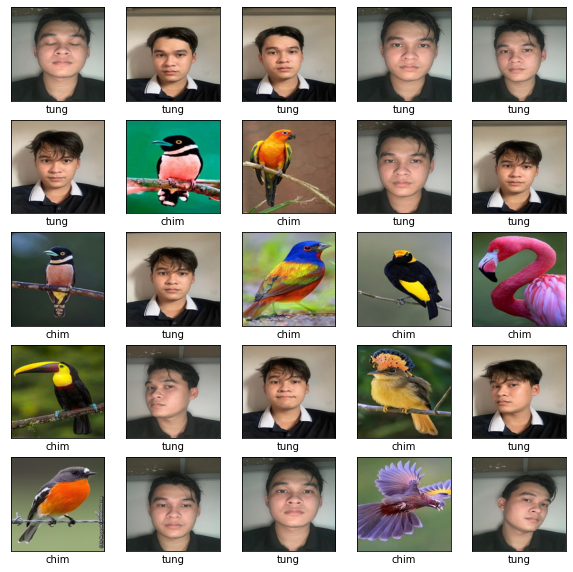

In [36]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [37]:
from keras.utils import np_utils
x_train=x_train.reshape(55,67500)
x_test=x_test.reshape(30,67500)
x_validation=x_validation.reshape(4,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)
y_validation= np_utils.to_categorical(y_validation,2)


In [38]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(67500,)))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              67501000  
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 68,504,002
Trainable params: 68,504,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [40]:
history=model.fit(x_train,y_train,batch_size=90,epochs=500,verbose=1,validation_data=(x_validation,y_validation),callbacks=[EarlyStopping(monitor='val_loss',patience = 30)]) #epochs số lần học

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.7032 - accuracy: 0.5091 - val_loss: 436.7941 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 127ms/step - loss: 462.6135 - accuracy: 0.4545 - val_loss: 808.0964 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 109ms/step - loss: 991.4993 - accuracy: 0.5455 - val_loss: 79.7596 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 109ms/step - loss: 104.1405 - accuracy: 0.5455 - val_loss: 177.6349 - val_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 105ms/step - loss: 188.5766 - accuracy: 0.4545 - val_loss: 38.6818 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 105ms/step - loss: 48.2829 - accuracy: 0.5455 - val_loss: 40.4440 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 105ms/step - loss: 43.4794 - accuracy: 0.4545 - val_loss: 40.5416 - val_accuracy: 0.5

In [41]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0
Test accuary 1.0


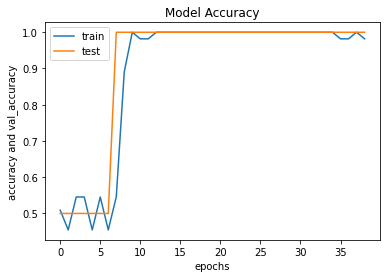

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy and val_accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

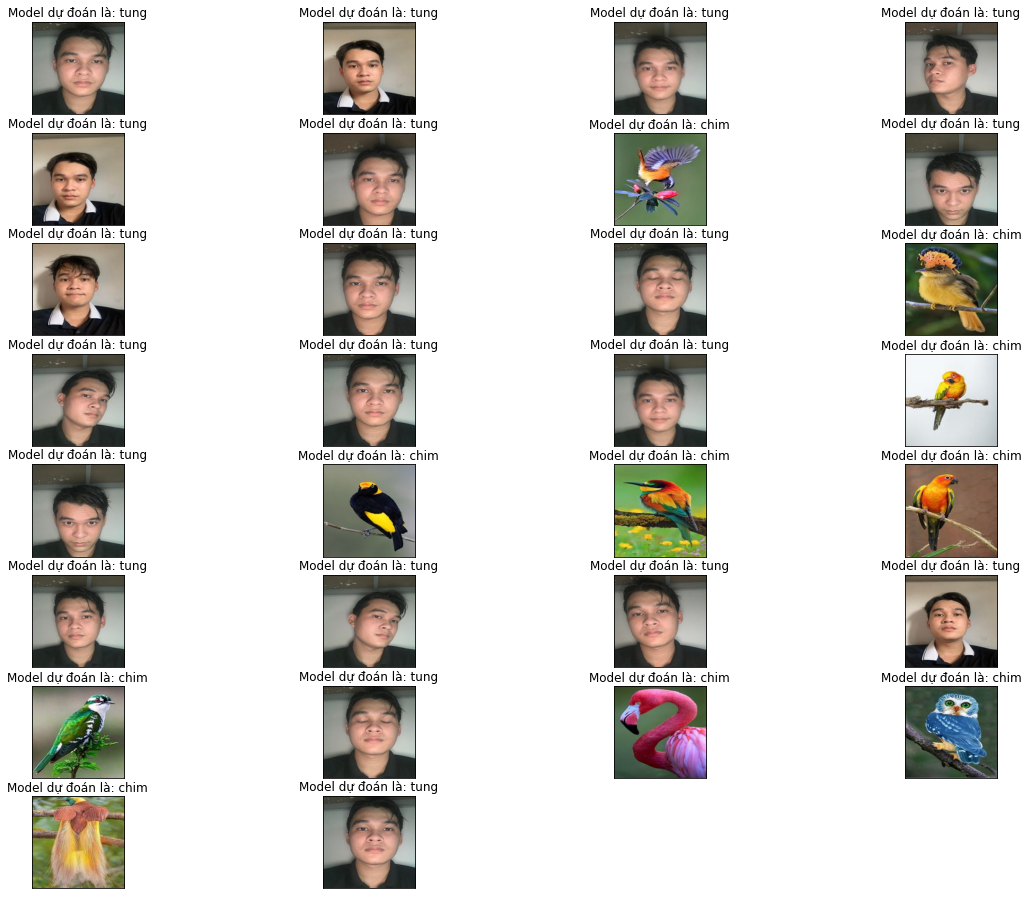

In [43]:
plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()